# New York Airbnb Dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png
/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv


In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

Load Data

In [3]:
Data = pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

In [4]:
Data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
Data.shape

(48895, 16)

In [6]:
Data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
Data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Exploratory Data Analysis

In [8]:
#Drop unnecessary columns

Data.drop(['name','host_name'], axis = 1, inplace = True)

In [9]:
#checking if there are null values

Data.isnull().sum()

id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
#view the columns of the data
Data.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [11]:
#view the different room types
Data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

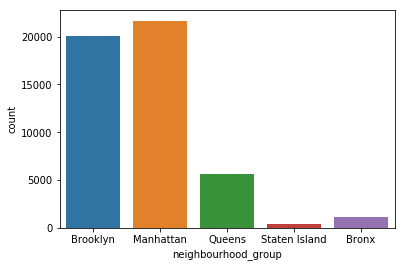

In [12]:
#view the number of airbnb booked in the neighbourhood groups
sns.countplot(Data['neighbourhood_group'])

We observe from the countplot that more airbnbs listings in Manhattan followed by Brooklyn

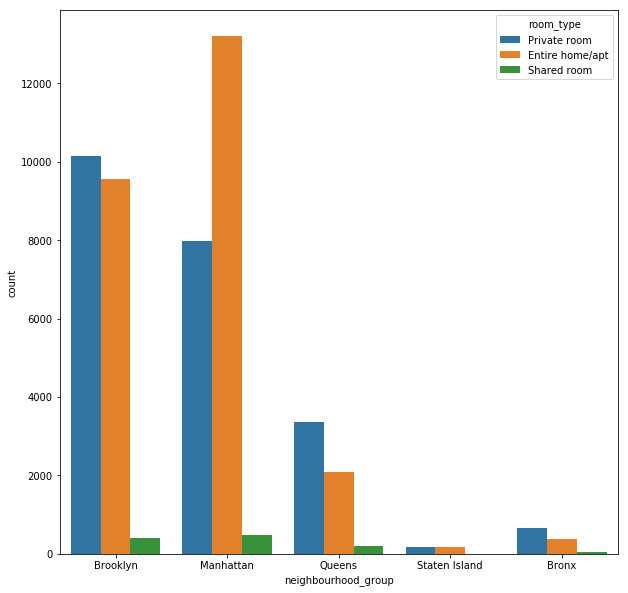

In [13]:
#view the countplot for the different neighbourhood groups with room type as hue
plt.figure(figsize=[10,10])
sns.countplot(Data['neighbourhood_group'], hue = Data.room_type)

We observe that in Manhattan there are more entire apartments followed by private rooms and lastly shared rooms.
The situation is quite different in Brooklyn. There are about 300 more private rooms than entire apartments

In [14]:
#selecting our target and features
X = Data.drop('price', axis = 1)
y = Data.price

X_train_full,X_valid_full,y_train,y_valid = train_test_split(X,y, train_size = 0.6, random_state = 0)

#get categorical columns in the data
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype == 'object' 
                    and X_train_full[cname].nunique()<10]

#get numerical columns in the data
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64','float64']]

my_cols = categorical_cols + numerical_cols

X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()


In [15]:
#peek at the training data
X_train.head()

,neighbourhood_group,room_type,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
44812,Bronx,Private room,34415817,241454071,40.81892,-73.88590,2,4,4.00,2,27
38660,Brooklyn,Private room,30377430,226410657,40.68553,-73.93215,30,1,0.65,27,346
13679,Manhattan,Entire home/apt,10251768,19927798,40.79366,-73.94059,1,4,0.11,1,0
29449,Brooklyn,Private room,22588459,17799362,40.70635,-73.93658,2,1,0.06,1,0
33290,Manhattan,Entire home/apt,26293088,43297299,40.73886,-74.00413,3,6,0.94,1,0


****

In [16]:
#preprocessing of numerical data
numerical_transformer = SimpleImputer(strategy='mean')

#preprocessing of categorical data

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'constant')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

#bundle preprocessing for numerical and categorical data

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

In [17]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=0)

In [18]:
my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model',model)
])

my_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='mean',
                                                                verbose=0),
                                                  ['id', 'host_id', 'latitude',
                                                   'longitude',
                                                   'minimum_nights',
         

In [19]:
pred = my_pipeline.predict(X_valid)

In [20]:
from sklearn.metrics import mean_absolute_error

In [21]:
mean_absolute_error(y_valid,pred)

66.76049391553329